# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
df = pd.read_csv('data/human_body_temperature.csv')

In [92]:
dfg=df.groupby(by="gender").std()
print(dfg)

        temperature  heart_rate
gender                         
F          0.743488    8.105227
M          0.698756    5.875184


(array([0.05128205, 0.07692308, 0.12820513, 0.23076923, 0.23076923,
        0.58974359, 0.46153846, 0.56410256, 0.51282051, 0.28205128,
        0.12820513, 0.        , 0.05128205, 0.        , 0.02564103]),
 array([ 96.3,  96.6,  96.9,  97.2,  97.5,  97.8,  98.1,  98.4,  98.7,
         99. ,  99.3,  99.6,  99.9, 100.2, 100.5, 100.8]),
 <a list of 15 Patch objects>)

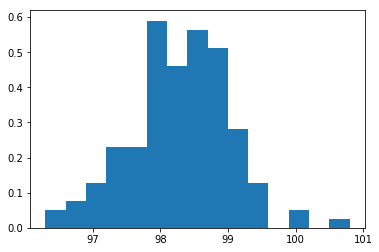

In [93]:
plt.hist(df.temperature, density=True, bins=15)

In [94]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [95]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates



In [96]:
#samples=np.random.choice(df.temperature, 10)


In [97]:
bs=draw_bs_reps(df.temperature, np.mean, 10000)

# **** ANSWER 1
IS the population normally distributed?
The answer is yes, roughly normally distributed, according to the ECDF graph and sample replicates drawn below.

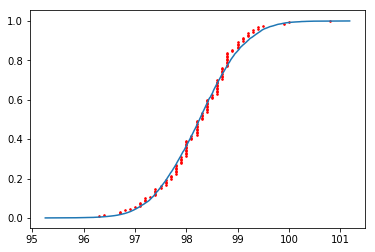

In [100]:
np.percentile(bs, [2.5,97.5])
x,y=ecdf(df.temperature)
plt.scatter(x,y, color="red", s=2.5)

sigma=np.std(df.temperature)
mu=np.mean(df.temperature)

# Sample out of a normal distribution with this mu and sigma: samples
samples1=np.random.normal(mu,sigma,10000)
x1,y1=ecdf(samples1)
plt.plot(x1,y1)

In [114]:

stats.mstats.normaltest(df['temperature'])  # check if p value is higher than critical value which is 0.05

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

# **** ANSWER 2
Is the sample size large? Are the observations independent?

We need more information to answer independence part of  this question precisely 
(ie., was the population selected with replacement), 
but we can say 130<<<world population, so it would be safe to say independent (less than %10)

sample size > 30 is considered large enough.

In [106]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# **** ANSWER 3
Is the true population mean really 98.6 degrees F?
To understand we can use the bootstrap method. We first subtract the mean temprature of the sample, and add the theoretic mean value of 98.6. We are trying to find if the result is at least similar or more extreme probabalistic wise. Since we are increasing the mean from 98.25 to 98.6, we should test and see the probabilty (p value).
When we look at the distribution, the avg value of the original sample population (of 130 people) is almost off chart, and p value is 0. It means it is (almost, if truncated) impossible to have an avg temperature of 98.6.

p =  0.0
98.24923076923078
98.3030769230769


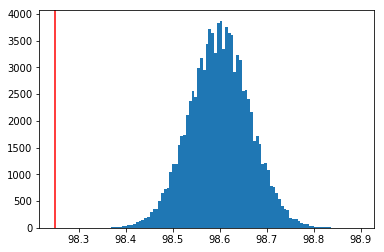

In [90]:
# Make an array of translated temperature
temp=df.temperature
translated_temp = temp-np.mean(temp)+98.6

# Take bootstrap replicates of translated temperature
bst = draw_bs_reps(translated_temp, np.mean, 100000)

# Compute fraction of replicates that are less than the observed temperature
p = np.sum(bst <= np.mean(temp)) / 100000

# Print the p-value
print('p = ', p)
print(temp.mean())
print(bst.min())
plt.hist(bst, bins=100)
plt.axvline(temp.mean(), color='red')

Z TEST reveals the same result, since we are testing a confidence interval of 95% or critical value alpha of 0.05, it must be within 2 std (1.96 to be more precise). Since z=-5.45 falls outside -1.96 std, +1,96 (outside of which are the two tails) std region of the mean, we say we reject the null hypothesis.  Also when we use stats.norm.cdf function, we can see that the p value for 2 tailed test is almost 0. This is the same for the t test.

In [110]:
z = (temp.mean() - 98.6)/(temp.std() / np.sqrt(len(temp)))  #how many std off
z #reject since it is off |1.96|

-5.454823292364079

In [115]:
stats.norm.cdf(z) * 2


4.90215701411338e-08

In [116]:
sample_size=len(temp)
t = (temp.mean() - 98.6)/(temp.std() / np.sqrt(sample_size))  #how many std off
t #reject since it is off |1.96|

-5.454823292364079

# **** Answer 4
Draw n=10 samples and repeat both z and t tests
This time I will do it with sample size 10 which is less than the critical value of 30, and with sample size of 30.
The numbers are exactly in contradiction, which shows us the significance of ciritical sample number.

In [144]:
choose=np.random.choice(temp,10)
choose
choose1=np.random.choice(temp,30)
choose1

array([98.4, 97.2, 97.4, 98.3, 97. , 98.8, 97.8, 97.4, 96.4, 98.6, 98.4,
       98.7, 99.1, 98.4, 97.5, 98. , 96.7, 98.2, 96.7, 97.8, 98.3, 99.3,
       98.7, 97.1, 98.7, 97.6, 99.1, 99. , 98.2, 99. ])

In [147]:
z1 = (choose.mean() - 98.6)/(choose.std() / np.sqrt(len(choose)))  #how many std off
z2 = (choose1.mean() - 98.6)/(choose1.std() / np.sqrt(len(choose1)))
print(z1)
print(z2)

-0.7262664434060779
-3.735059542396154


In [149]:
sample_size=len(choose)
t1 = (choose.mean() - 98.6)/(choose.std() / np.sqrt(sample_size))  #how many std off

sample_size=len(choose1)
t2 = (choose1.mean() - 98.6)/(choose1.std() / np.sqrt(sample_size))
print(t1)
print(t2)

-0.7262664434060779
-3.735059542396154


# ***answer 5

Margin of error for 95% confidence interval is 1.95 standard deviations.


In [151]:
margin=1.96*temp.std()/np.sqrt(len(temp))
margin

0.12603665700226638

In [157]:
margins=[temp.mean()-margin,temp.mean()+margin]
margins

[98.12319411222852, 98.37526742623304]

In [165]:
perc1=np.percentile(bst, [0.5,99.5])
perc1   #this gives me a 99% confidence interval

array([98.43307692, 98.76615385])

###### Answer 6

Comparison between male and female temperature means. WE use a two sample z test. Also we could use bootstrap permutation.

$$z = \frac{(\bar{x}_M - \bar{x}_F) - 0}{\sqrt{\frac{\sigma_M^2}{n_M} + \frac{\sigma_F^2}{n_F}}}$$

In [207]:
male=df[df.gender=="M"]['temperature']
fem=df[df.gender=="F"]['temperature']
print(male.mean())
print(fem.mean())

98.1046153846154
98.39384615384613


In [ ]:
males = df.gender == 'M'
diff_means = df.temperature[males].mean() - df.temperature[~males].mean()
sd_male = df.temperature[males].std()
sd_female = df.temperature[~males].std()
n_male = np.sum(males)
n_female = len(df.temperature) - n_male

z = diff_means / np.sqrt(((sd_male ** 2)/ n_male) + ((sd_female ** 2)/ n_female))
z


In [185]:
diff=male.mean()-fem.mean()
z=diff/np.sqrt(((male.std()**2)/male.count()) + (fem.std()**2)/fem.count())
z

-2.285434538165274

In [192]:
pval = stats.norm.cdf(z) * 2
pval


0.02228736076067726

In [205]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [195]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [244]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(male,fem)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(male, fem,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates < empirical_diff_means) / len(perm_replicates)
p

0.0123

In [227]:
p

0.9892

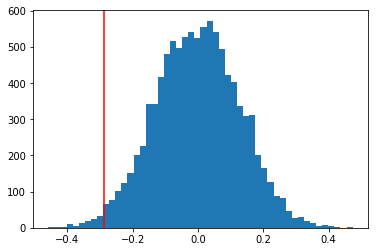

In [242]:
plt.hist(perm_replicates, bins=50)
plt.axvline(empirical_diff_means, color='red')  #### See the position of the red line and it does not change with
# p = np.sum(perm_replicates < empirical_diff_means) / len(perm_replicates) since this plot does not imply the comparison,
#but depits perfectly that male and female temp means are not the same.
